In [29]:
!pip install tensorly

In [256]:
import tensorly 
import numpy as np
from PIL import Image
import matplotlib.pylab as plt
from numpy import linalg as la

# Tensore di immagini di trainig

In [291]:
tensor_immagini_traning = np.zeros((10304,7,40)) #array con tutte le immagini (7 trainig
for i in range(40):
    for j in range(7):
        tensor_immagini_traning[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+1)+'.pgm')), (10304))

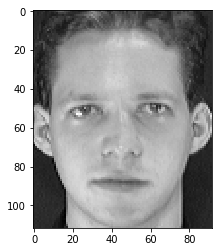

In [292]:
plt.imshow(np.reshape(tensor_immagini_traning[:,0,0],(112,92)), cmap='gray')

# HOSVD (calcolo svd sui vari unfolding)

In [293]:
U1, s1, V1 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,0),full_matrices =False)
U2, s2, V2 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,1),full_matrices=False)
U3, s3, V3 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,2),full_matrices=False)

Text(0,0.5,'Singular values')

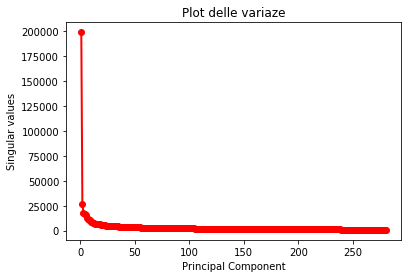

In [294]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(280) + 1
plt.plot(sing_vals, s1, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

Text(0,0.5,'Singular values')

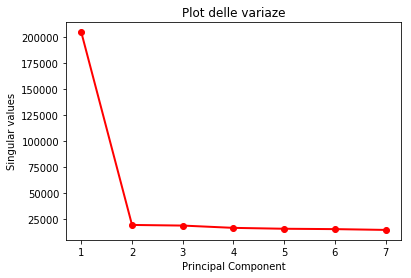

In [295]:
fig1 = plt.figure(figsize=(6,4))
sing_vals = np.arange(7) + 1
plt.plot(sing_vals, s2, 'ro-', linewidth=2)
plt.title('Plot delle variaze')
plt.xlabel('Principal Component')
plt.ylabel('Singular values')

In [296]:
p = 10

In [297]:
q = 7 #(massimo 7)

## considero solo p eigenpixel e q eigenpeople   p>q

In [298]:
U_p = np.zeros((10304,p))
for i in range (p):
    U_p[:,i] = U1[:,i]

In [299]:
U_q = np.zeros((7,q))
for i in range (q):
    U_q[:,i] = U2[:,i]

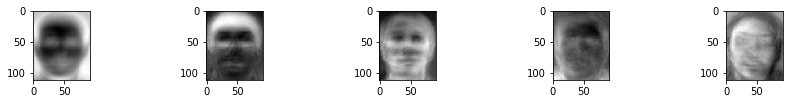

In [300]:
fig = plt.figure(figsize=(15,15))
for i in range (num_eigenpixel):
    plt.subplot(10,5,i+1)
    plt.imshow(np.reshape(eigenpixel[:,i],(112,92)), cmap='gray')

# Calcolo core tensor

In [301]:
S=tensorly.tenalg.mode_dot(tensor_immagini_traning, np.transpose(U_p), mode=0)
S=tensorly.tenalg.mode_dot(S, np.transpose(U_q), mode=1)
#S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)

# Provo a classificare una sola immagine di test

In [302]:
immagine_test = np.reshape(plt.imread(("../Data-set/s38/9.pgm")), (1,10304))

# Proietto l'immagine di test lungo gli eigenpixel

In [303]:
immagine_test_tens = U_p.T.dot(immagine_test.T)

## calcolo basi per ogni persona(svd di ogni slice frontale) considerando solo il primo autovettore di sinistra, successivamente classifico l'immagine

In [304]:
k = 7
B_u = np.zeros((p,k,40))
for i in range (40):
    U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
    for j in range(k):
        B_u[:,j,i] = U1[:,j]

In [305]:
core_basis_residui = np.zeros((40))
for i in range (40):
    x_u = B_u[:,:,i].T.dot(immagine_test_tens) 
    core_basis_residui[i] =  np.linalg.norm(immagine_test_tens - B_u[:,:,i].dot(x_u), 2)

In [306]:
core_basis_residui.argmin()

37

# Ripeto l'esperimento considerando tutte le immagini di test

# 

## calcolo le basi per ogni persona

In [314]:
k = 7
B_u = np.zeros((p,k,40))
for i in range (40):
    U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
    for j in range(k):
        B_u[:,j,i] =  U1[:,j]

## Tensore di immagine di test(non vengono applicate operazioni tensoriali su tale tensore), le immagini vengono considerate come vettori per la classificazione

In [315]:
tensor_immagini_test = np.zeros((10304,3,40)) #tensore con 3 immagini di test per ogni persona(40 persone)
for i in range(40):
    for j in range(3):
        tensor_immagini_test[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+8)+'.pgm')), (10304))

## proietto ogni singola immagine lungo gli eigenpixel

In [316]:
tensor_immagini_testj=tensorly.tenalg.mode_dot(tensor_immagini_test, np.transpose(U_p), mode=0)#proietto d*Uj

# Classifico ogni singola immagine di test

In [317]:
residui = np.zeros(40)
residui_minimi = np.zeros((40,3))
for i in range(40):#persone
    for j in range(3):#immagini stessa persona classificate una alla volta
        for k in range(40):
            x_u = B_u[:,:,k].T.dot(tensor_immagini_testj[:,j,i]) 
            residui[k] =  np.linalg.norm(tensor_immagini_testj[:,j,i] - B_u[:,:,k].dot(x_u) , 2)
        residui_minimi[i,j] = residui.argmin()

In [318]:
residui_minimi

array([[ 1., 27.,  0.],
       [ 1.,  1.,  1.],
       [ 2., 38., 38.],
       [ 3.,  3.,  3.],
       [34., 34., 15.],
       [ 5.,  5.,  5.],
       [ 6.,  6., 35.],
       [ 7.,  7.,  7.],
       [ 8.,  8.,  3.],
       [ 9.,  9., 39.],
       [10., 10., 10.],
       [11., 25., 25.],
       [12., 12., 12.],
       [13., 18., 13.],
       [37.,  2., 14.],
       [ 3., 33.,  1.],
       [16., 16., 16.],
       [17., 17., 17.],
       [18., 26., 18.],
       [19., 19., 19.],
       [20., 20., 20.],
       [37., 21., 21.],
       [20., 22., 22.],
       [23., 23., 23.],
       [ 2., 24., 24.],
       [25., 25., 25.],
       [26., 26., 10.],
       [36., 16., 27.],
       [14., 28.,  2.],
       [29., 29., 29.],
       [30., 30., 30.],
       [31., 31., 31.],
       [28., 32., 32.],
       [33., 24., 24.],
       [34., 34.,  4.],
       [ 3., 37., 16.],
       [36., 36., 36.],
       [37., 37., 38.],
       [24., 37., 37.],
       [39., 34., 39.]])

In [319]:
num_classificazioni_corrette = 0
k = 0
for i in range(40):
    for j in range(3):
        if(residui_minimi[i,j]==k):
            num_classificazioni_corrette = num_classificazioni_corrette + 1
    k =k + 1

In [320]:
(num_classificazioni_corrette/120)*100

67.5

# Ripeto l'esperimento iterando(considerando) su tutti gli eigenpixel in maniera incrementale 

In [350]:
def hosvd_classificazione(U_p,p,k,U_q,tensor_immagini_traning,tensor_immagini_test):
    S=tensorly.tenalg.mode_dot(tensor_immagini_traning, np.transpose(U_p), mode=0)
    S=tensorly.tenalg.mode_dot(S, np.transpose(U_q), mode=1)
    #S=tensorly.tenalg.mode_dot(S, np.transpose(U3), mode=2)
    B_u = np.zeros((p,k,40))#calcoliamo basi una per ognuna delle 40 persone(prendiamo solo il primo vettore singolare sinistro della svd sulle slice frontali dove ogni slice rappresenta una persona)
    for i in range (40):
        U1, s1, V1 = np.linalg.svd(S[:,:,i],full_matrices =False)
        for j in range(k):
            B_u[:,j,i] =  U1[:,j]
    tensor_immagini_testj=tensorly.tenalg.mode_dot(tensor_immagini_test, np.transpose(U_p), mode=0)#proietto d*Uj
    residui = np.zeros(40)
    residui_minimi = np.zeros((40,3))
    for i in range(40):#persone
        for j in range(3):#immagini stessa persona classificate una alla volta
            for k in range(40):
                x_u = B_u[:,:,k].T.dot(tensor_immagini_testj[:,j,i]) 
                residui[k] =  np.linalg.norm(tensor_immagini_testj[:,j,i] - B_u[:,:,k].dot(x_u) , 2)
            residui_minimi[i,j] = residui.argmin()
    num_classificazioni_corrette = 0
    k = 0
    for i in range(40):
        for j in range(3):
            if(residui_minimi[i,j]==k):
                num_classificazioni_corrette = num_classificazioni_corrette + 1
        k =k + 1
    return (num_classificazioni_corrette/120)*100

In [351]:
tensor_immagini_traning = np.zeros((10304,7,40)) #array con tutte le immagini (7 trainig, 3 test)
for i in range(40):
    for j in range(7):
        tensor_immagini_traning[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+1)+'.pgm')), (10304))

In [352]:
U1, s1, V1 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,0),full_matrices =False)
U2, s2, V2 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,1),full_matrices=False)
U3, s3, V3 = np.linalg.svd(tensorly.unfold(tensor_immagini_traning,2),full_matrices=False)

In [362]:
q = 7 #(massimo 7)
U_q = np.zeros((7,q))
for i in range (q):
    U_q[:,i] = U2[:,i]

In [363]:
tensor_immagini_test = np.zeros((10304,3,40)) #tensore con 3 immagini di test per ogni persona(40 persone)
for i in range(40):
    for j in range(3):
        tensor_immagini_test[:,j,i] = np.reshape(plt.imread(("../Data-set/"+"s"+str(i+1)+'/'+str(j+8)+'.pgm')), (10304))

In [365]:
percentuale_classificazione = np.zeros((280))
for p in range(10,281):
    U_p = np.zeros((10304,p))
    for j in range (p):
        U_p[:,j] = U1[:,j]
    percentuale_classificazione[p-1] = hosvd_classificazione(U_p,p,7,U_q,tensor_immagini_traning,tensor_immagini_test)
    print("Eigenpixel= "+ str(p)+ "       percentuale classificazione= " + str(percentuale_classificazione[p-1]))
    

Eigenpixel= 10       percentuale classificazione= 67.5
Eigenpixel= 11       percentuale classificazione= 82.5
Eigenpixel= 12       percentuale classificazione= 85.0
Eigenpixel= 13       percentuale classificazione= 90.83333333333333
Eigenpixel= 14       percentuale classificazione= 92.5
Eigenpixel= 15       percentuale classificazione= 92.5
Eigenpixel= 16       percentuale classificazione= 94.16666666666667
Eigenpixel= 17       percentuale classificazione= 95.83333333333334
Eigenpixel= 18       percentuale classificazione= 95.83333333333334
Eigenpixel= 19       percentuale classificazione= 95.83333333333334
Eigenpixel= 20       percentuale classificazione= 95.83333333333334
Eigenpixel= 21       percentuale classificazione= 95.83333333333334
Eigenpixel= 22       percentuale classificazione= 95.83333333333334
Eigenpixel= 23       percentuale classificazione= 95.83333333333334
Eigenpixel= 24       percentuale classificazione= 95.83333333333334
Eigenpixel= 25       percentuale classificazi

Eigenpixel= 134       percentuale classificazione= 95.0
Eigenpixel= 135       percentuale classificazione= 95.0
Eigenpixel= 136       percentuale classificazione= 95.0
Eigenpixel= 137       percentuale classificazione= 95.0
Eigenpixel= 138       percentuale classificazione= 95.0
Eigenpixel= 139       percentuale classificazione= 95.0
Eigenpixel= 140       percentuale classificazione= 95.0
Eigenpixel= 141       percentuale classificazione= 95.0
Eigenpixel= 142       percentuale classificazione= 95.83333333333334
Eigenpixel= 143       percentuale classificazione= 95.83333333333334
Eigenpixel= 144       percentuale classificazione= 95.83333333333334
Eigenpixel= 145       percentuale classificazione= 95.83333333333334
Eigenpixel= 146       percentuale classificazione= 95.83333333333334
Eigenpixel= 147       percentuale classificazione= 95.83333333333334
Eigenpixel= 148       percentuale classificazione= 95.83333333333334
Eigenpixel= 149       percentuale classificazione= 95.83333333333334


Eigenpixel= 278       percentuale classificazione= 95.0
Eigenpixel= 279       percentuale classificazione= 95.0
Eigenpixel= 280       percentuale classificazione= 95.0


ValueError: x and y must have same first dimension, but have shapes (270,) and (280,)

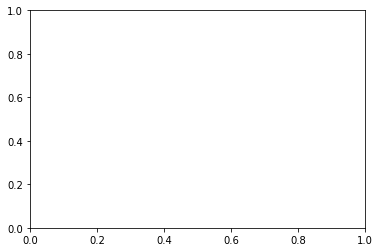

In [367]:
fig2 = plt.figure(figsize=(6,4))
eigenpixel_vals = np.arange(270) + 1
plt.plot(eigenpixel_vals, percentuale_classificazione, 'ro-', linewidth=2)
plt.title('Plot clasificazione')
plt.xlabel('numero eigenpixel')
plt.ylabel('percentuale classificazione')